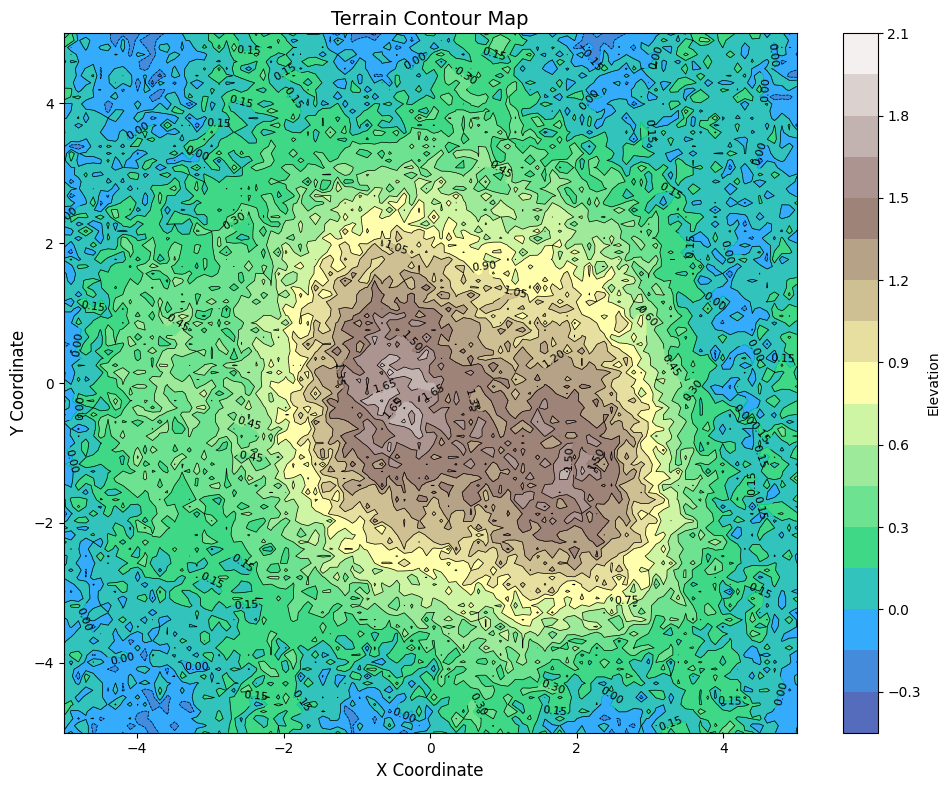

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ====================
# 生成地形数据集
# ====================
# 创建x,y坐标网格（范围：-5到5，步长0.25）
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# 使用组合函数生成地形高度数据（Z值）
Z = (
    # 基础地形
    1.5 * np.exp(-(X**2 + Y**2)/8) +  # 中心山峰
    0.8 * np.exp(-((X-2)**2 + (Y+2)**2)/3) -  # 次级山峰
    0.2 * np.sin(2*X) * np.cos(Y/2) +  # 波浪效果
    np.random.normal(scale=0.1, size=X.shape)  # 随机噪声
)

# ====================
# 绘制等高线图
# ====================
plt.figure(figsize=(10, 8))

# 绘制填充等高线图
contourf = plt.contourf(X, Y, Z, 
                       levels=20,          # 等高线层级数
                       cmap='terrain',     # 使用地形色标
                       alpha=0.8)          # 透明度

# 叠加等高线
contour = plt.contour(X, Y, Z, 
                     levels=20, 
                     colors='k',           # 黑色等高线
                     linewidths=0.5)       # 线宽

# 添加标签和说明
plt.clabel(contour, inline=True, fontsize=8)  # 等高线数值标签
plt.colorbar(contourf, label='Elevation')     # 颜色条
plt.title('Terrain Contour Map', fontsize=14)
plt.xlabel('X Coordinate', fontsize=12)
plt.ylabel('Y Coordinate', fontsize=12)

# 显示图形
plt.tight_layout()
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 定义地形生成函数（可复用）
def generate_terrain(seed, peaks=2, noise_scale=0.1):
    """
    生成随机地形数据
    参数：
        seed - 随机种子（确保不同地形）
        peaks - 山峰数量
        noise_scale - 噪声强度
    """
    np.random.seed(seed)
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)
    
    Z = np.zeros_like(X)
    
    # 生成随机山峰
    for _ in range(peaks):
        x0 = np.random.uniform(-4, 4)
        y0 = np.random.uniform(-4, 4)
        amp = np.random.uniform(0.5, 2.0)
        width = np.random.uniform(2, 5)
        Z += amp * np.exp(-((X-x0)**2 + (Y-y0)**2)/width**2)
    
    # 添加地形特征
    Z += 0.3 * np.sin(2*X) * np.cos(Y)          # 波浪纹理
    Z += 0.2 * Y * np.sin(0.8*X)               # 定向波纹
    Z += np.random.normal(scale=noise_scale, size=X.shape)  # 随机噪声
    
    return X, Y, Z

# 生成四个不同地形数据集
terrains = [
    generate_terrain(seed=1, peaks=3, noise_scale=0.15),  # 多峰地形
    generate_terrain(seed=5, peaks=1, noise_scale=0.05),  # 单峰平滑地形
    generate_terrain(seed=10, peaks=4, noise_scale=0.2),  # 复杂地形
    generate_terrain(seed=8, peaks=2, noise_scale=0.1)    # 双峰地形
]

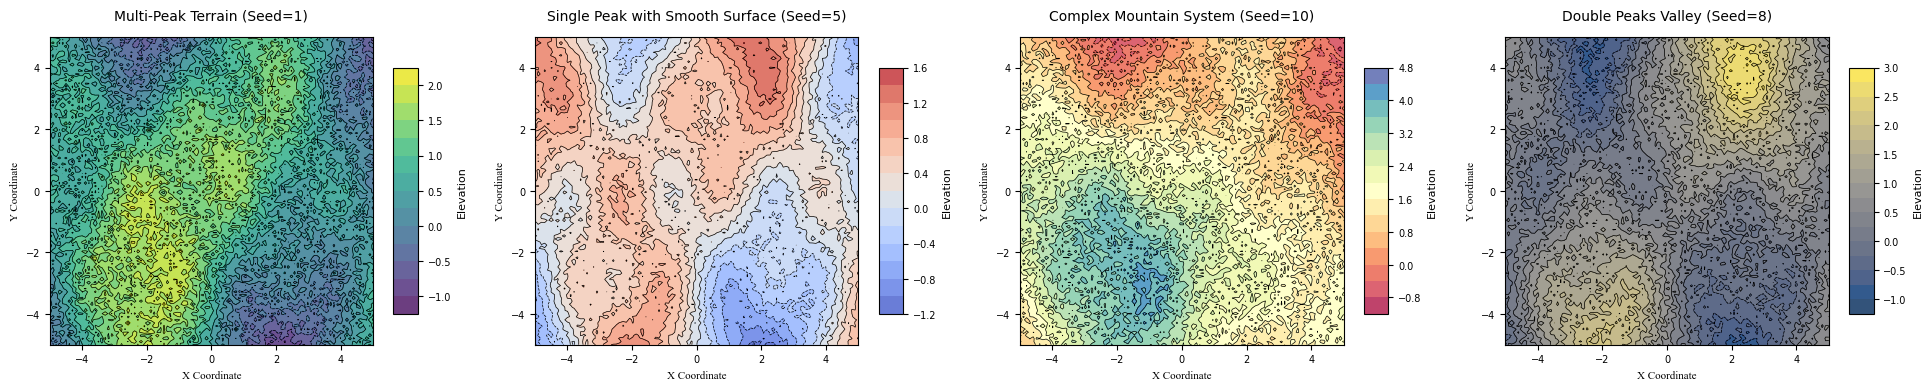

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 中英文字体设置
from matplotlib.font_manager import FontProperties
font_cn = FontProperties(fname=r"C:\Windows\Fonts\simsun.ttc", size=18)  # 设置字体路径和大小
font_en = FontProperties(fname=r"C:\Windows\Fonts\times.ttf", size=18)  # 设置字体路径和大小

# 创建1*4子图
fig, axes = plt.subplots(1, 4, figsize=(24, 4)) # 1行4列, 图片大小为24*4
plt.subplots_adjust(wspace=0.2, hspace=0.3)  # 调整子图间距, 水平间距0.2, 垂直间距0.3

# 子图地形描述标签
titles = [
    "Multi-Peak Terrain (Seed=1)",
    "Single Peak with Smooth Surface (Seed=5)",
    "Complex Mountain System (Seed=10)",
    "Double Peaks Valley (Seed=8)"
]

# 颜色映射列表
cmaps = ['viridis', 'coolwarm', 'Spectral', 'cividis'] # 为每个子图分配不同的颜色映射

# 遍历绘制四个子图
for idx, (ax, (X, Y, Z), title) in enumerate(zip(axes.flat, terrains, titles)):
    # 绘制填充等高线，使用不同的颜色映射
    cf = ax.contourf(X, Y, Z, levels=15, cmap=cmaps[idx], alpha=0.8)
    
    # 叠加等高线
    contour = ax.contour(X, Y, Z, levels=15, 
                        colors='k', linewidths=0.5)
    
    # 子图装饰
    ax.set_title(title, fontsize=10, pad=12)
    ax.set_xlabel("X Coordinate", fontsize=8, fontproperties=font_en)
    ax.set_ylabel("Y Coordinate", fontsize=8, fontproperties=font_en)
    ax.tick_params(axis='both', which='major', labelsize=7)
    
    # 添加颜色条（每个子图独立）
    # 修改颜色条位置和大小
    cbar = fig.colorbar(cf, ax=ax, shrink=0.8, aspect=10, pad=0.05) 
    # pad参数控制颜色条与子图的间距, 数值越大, 间距越大
    # aspect参数控制颜色条的宽度, 数值越大, 颜色条越窄
    # shrink参数控制颜色条的长度, 数值越小, 颜色条越短
    cbar.ax.tick_params(labelsize=7)
    cbar.set_label('Elevation', fontsize=8)

# 添加总标题
# plt.suptitle("Comparative Analysis of Simulated Terrain Features", 
#            y=0.98, fontsize=14, weight='bod')

# 保存图片（可选）
# plt.savefig('terrain_comparison.png', dpi=300, bbox_inches='tight')

plt.show()

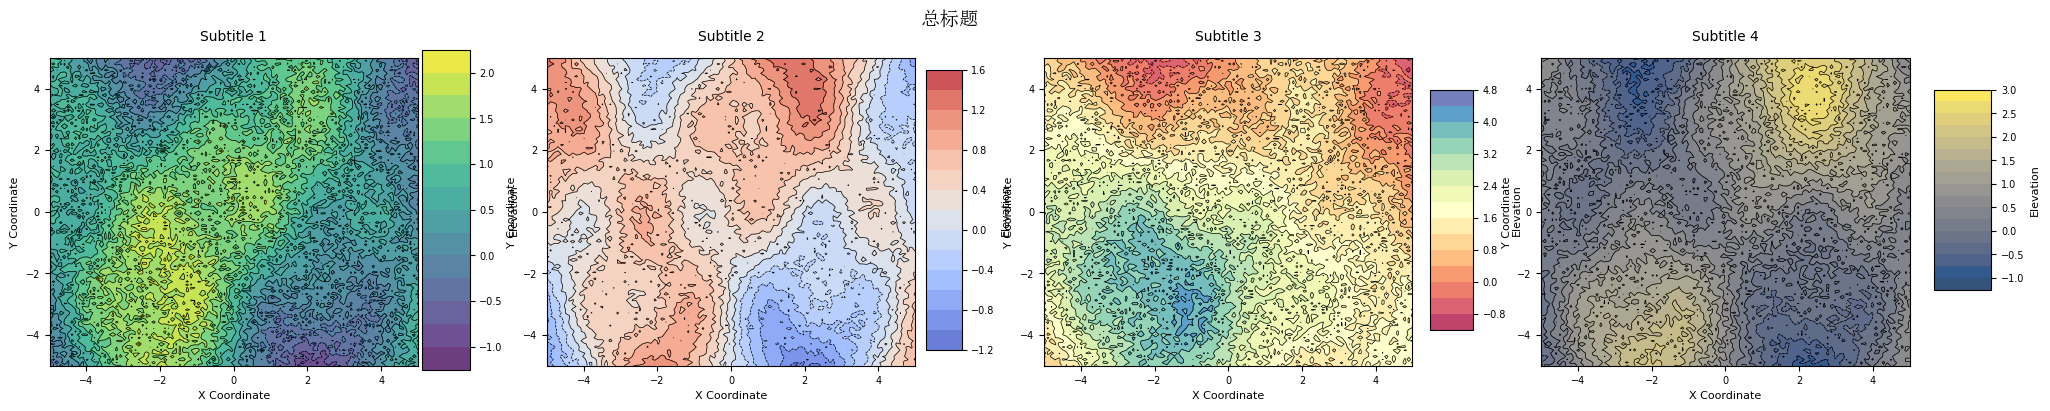

In [4]:
# 创建子图
fig, axes = plt.subplots(1, 4, figsize=(24, 4)) # 1行4列, 图片大小为26*4
plt.subplots_adjust(wspace=0.35, hspace=0.3)  # 调整子图间距，wspace和hspace分别控制水平和垂直间距   

# 地形描述标签，即子图的标题
titles = [
    "Subtitle 1",
    "Subtitle 2",
    "Subtitle 3",
    "Subtitle 4"
]

# 颜色映射列表
cmaps = ['viridis', 'coolwarm', 'Spectral', 'cividis']
# 为每个子图分配不同的颜色映射，可选的颜色包括：
# 'viridis', 'plasma', 'inferno', 'magma', 'cividis', 'coolwarm', 'Spectral', 'twilight', 'twilight_shifted'

# 颜色条位置和大小设置
# 标记的是顶点的位置，[左, 下, 宽, 高]，取值范围[0, 1]
cbar_pos = [
    [0.28, 0.1, 0.02, 0.8],  # [左, 下, 宽, 高]
    [0.49, 0.15, 0.015, 0.7],
    [0.7, 0.2, 0.018, 0.6],
    [0.91, 0.3, 0.024, 0.5]
]

# 遍历绘制四个子图
for idx, (ax, (X, Y, Z), title) in enumerate(zip(axes.flat, terrains, titles)):
    # 绘制填充等高线，使用不同的颜色映射
    cf = ax.contourf(X, Y, Z, levels=15, cmap=cmaps[idx], alpha=0.8)
    # levels=15表示等高线层级数，cmap=cmaps[idx]表示使用不同的颜色映射，alpha=0.8表示透明度

    # 叠加等高线
    contour = ax.contour(X, Y, Z, levels=15, 
                        colors='k', linewidths=0.5) # 等高线颜色为黑色（k），线宽为0.5；levels表示等高线层级数
    
    # 子图装饰
    ax.set_title(title, fontsize=10, pad=12) # pad参数控制标题与子图的间距；fontsize控制标题字号
    ax.set_xlabel("X Coordinate", fontsize=8) # 设置X轴标签名称和字号
    ax.set_ylabel("Y Coordinate", fontsize=8) # 设置Y轴标签名称和字号
    ax.tick_params(axis='both', which='major', labelsize=7) 
    # 设置刻度标签大小，axis='both'表示设置X和Y轴，which='major'表示设置主刻度
    
    # 添加颜色条（每个子图独立，位置和大小单独设置）
    cbar_ax = fig.add_axes(cbar_pos[idx]) # cbar_pos[idx]表示第idx个子图的颜色条位置
    cbar = fig.colorbar(cf, cax = cbar_ax) # cax参数指定颜色条的位置
    cbar.ax.tick_params(labelsize=7) # 设置颜色条刻度标签大小
    cbar.set_label('Elevation', fontsize=8) # 设置颜色条标签名称和字号

# 添加总标题
plt.suptitle("总标题", y=1.0, fontsize=14, weight='bold', fontproperties=font_cn)
# y=1.0表示标题距离顶部的距离，取值范围[0, 1]；
# fontsize=14表示标题字体大小；
# weight='bold'表示标题加粗；
# fontproperties=font_cn表示使用上文定义的中文字体

# 保存图片（可选）
# plt.savefig('terrain_comparison.png', dpi=300, bbox_inches='tight')
# bbox_inches='tight'表示将图片保存为紧凑的格式，无多余空白； dpi=300表示设置图片分辨率为300

plt.show()

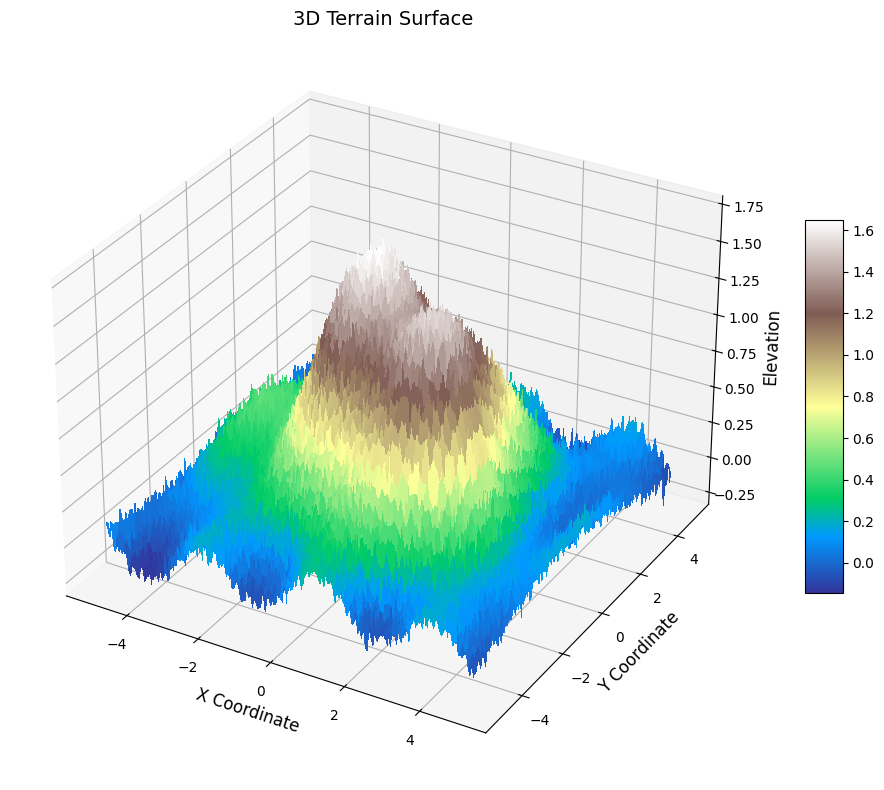

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 导入3D绘图工具
from scipy.ndimage import gaussian_filter  # 导入高斯滤波函数

# ====================
# 生成地形数据集
# ====================
# 创建x,y坐标网格（范围：-5到5，步长0.1）
x = np.linspace(-5, 5, 200)  # 增加数据点密度
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, y)

# 使用组合函数生成地形高度数据（Z值）
Z = (
    1.5 * np.exp(-(X**2 + Y**2)/8) +
    0.8 * np.exp(-((X-2)**2 + (Y+2)**2)/3) -
    0.2 * np.sin(2*X) * np.cos(Y/2) +
    np.random.normal(scale=0.05, size=X.shape)  # 减小随机噪声
)

# 应用高斯滤波
Z_smooth = gaussian_filter(Z, sigma=10)  # 调整 sigma 参数控制平滑程度

# ====================
# 绘制3D曲面图
# ====================
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')  # 创建3D子图

# 绘制3D曲面
surf = ax.plot_surface(X, Y, Z, 
                       cmap='terrain',  # 使用地形色标
                       linewidth=0, 
                       antialiased=False)

# 添加标签和说明
fig.colorbar(surf, shrink=0.5, aspect=10)  # 颜色条
ax.set_title('3D Terrain Surface', fontsize=14)
ax.set_xlabel('X Coordinate', fontsize=12)
ax.set_ylabel('Y Coordinate', fontsize=12)
ax.set_zlabel('Elevation', fontsize=12)  # 添加Z轴标签

# 显示图形
plt.tight_layout()
plt.show()

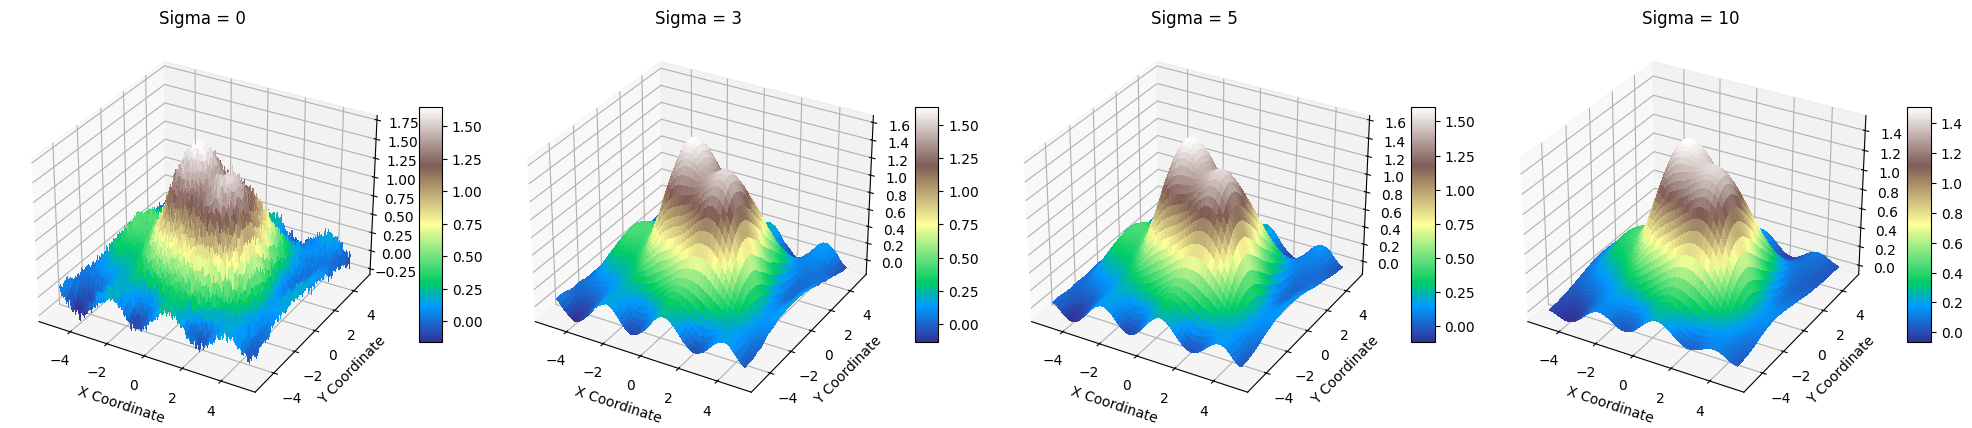

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.ndimage import gaussian_filter

# ====================
# 生成地形数据集
# ====================
x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, y)

Z = (
    1.5 * np.exp(-(X**2 + Y**2)/8) +
    0.8 * np.exp(-((X-2)**2 + (Y+2)**2)/3) -
    0.2 * np.sin(2*X) * np.cos(Y/2) +
    np.random.normal(scale=0.05, size=X.shape)
)

# 高斯平滑程度列表
sigmas = [0, 3, 5, 10]

# ====================
# 绘制子图
# ====================
fig = plt.figure(figsize=(20, 5))  # 调整图形大小以容纳四个子图

for i, sigma in enumerate(sigmas):
    # 应用高斯滤波
    if sigma == 0:
        Z_smooth = Z  # sigma=0时，不进行平滑
    else:
        Z_smooth = gaussian_filter(Z, sigma=sigma)

    # 创建3D子图
    ax = fig.add_subplot(1, 4, i + 1, projection='3d')

    # 绘制3D曲面
    surf = ax.plot_surface(X, Y, Z_smooth,
                           cmap='terrain',
                           linewidth=0,
                           antialiased=False)

    # 添加标题
    ax.set_title(f'Sigma = {sigma}', fontsize=12)

    # 添加标签
    ax.set_xlabel('X Coordinate', fontsize=10)
    ax.set_ylabel('Y Coordinate', fontsize=10)
    ax.set_zlabel('Elevation', fontsize=10)

    fig.colorbar(surf, shrink=0.5, aspect=10)

# 调整子图布局
plt.tight_layout()

# 显示图形
plt.show()